# __문자를 읽을 수 있는 딥러닝__

## __0. IMPORT__

In [1]:
%%capture
!pip install keras_ocr
!pip install pytesseract
!pip install --upgrade google-api-python-client
!pip install google-cloud-vision
!sudo apt install tesseract-ocr-kor

In [2]:
from glob import glob

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from tqdm import tqdm

# keras-ocr
import keras_ocr

# tesseract
import pytesseract
from PIL import Image
from pytesseract import Output
import re

from google.colab import drive
drive.mount('/content/drive')

from PIL import ImageDraw

import warnings
warnings.filterwarnings("ignore")

pipeline = keras_ocr.pipeline.Pipeline()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## **1. DATA**

In [3]:
img_dir = '/content/drive/MyDrive/ocr_python/time/'
time = glob(img_dir+"*.jpg")
time

['/content/drive/MyDrive/ocr_python/time/ji.jpg',
 '/content/drive/MyDrive/ocr_python/time/hwang.jpg',
 '/content/drive/MyDrive/ocr_python/time/bene.jpg',
 '/content/drive/MyDrive/ocr_python/time/eun.jpg',
 '/content/drive/MyDrive/ocr_python/time/bts.jpg',
 '/content/drive/MyDrive/ocr_python/time/ahn.jpg',
 '/content/drive/MyDrive/ocr_python/time/jongil.jpg',
 '/content/drive/MyDrive/ocr_python/time/moon.jpg',
 '/content/drive/MyDrive/ocr_python/time/kim.jpg',
 '/content/drive/MyDrive/ocr_python/time/korea.jpg',
 '/content/drive/MyDrive/ocr_python/time/zelensky.jpg',
 '/content/drive/MyDrive/ocr_python/time/moon2.jpg',
 '/content/drive/MyDrive/ocr_python/time/roh.jpg',
 '/content/drive/MyDrive/ocr_python/time/seri.jpg',
 '/content/drive/MyDrive/ocr_python/time/son.jpg']

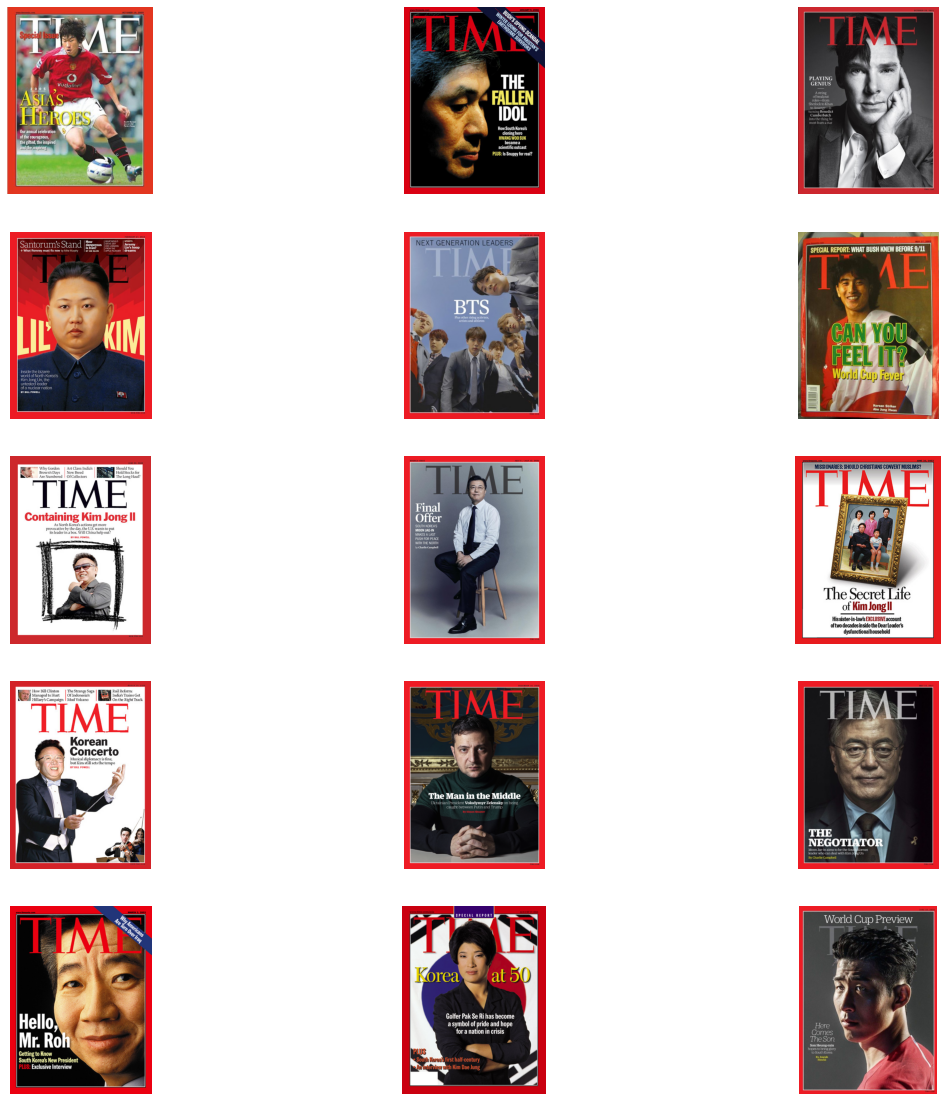

In [4]:
plt.figure(figsize=(20,20))

for idx, im in enumerate(time):
#     im =  img_dir +'/'+ im
    plt.subplot(5, 3, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

## **2. OCR 모음**

## **2.1 google api**

In [5]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [6]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  '/content/drive/MyDrive/ocr_python/hello.json'

path = '/content/drive/MyDrive/ocr_python/time/ji.jpg'

detect_text(path)

total 8
drwx------ 5 root root 4096 Jun 16 11:32 drive
drwxr-xr-x 1 root root 4096 Jun  1 13:50 sample_data
Texts:

"www.asia.com
Special Issue
Vodafore
2005
ASIA'S
HEROES
Our annual celebration
of the courageous,
the gifted, the inspired
and the inspiring
OCTOBER 10, 2000
South Kor
soccer
Park S"

"www.asia.com"

"Special"

"Issue"

"Vodafore"

"2005"

"ASIA'S"

"HEROES"

"Our"

"annual"

"celebration"

"of"

"the"

"courageous"

","

"the"

"gifted"

","

"the"

"inspired"

"and"

"the"

"inspiring"

"OCTOBER"

"10"

","

"2000"

"South"

"Kor"

"soccer"

"Park"

"S"
bounds: (337,327),(340,327),(340,330),(337,330)


[/content/drive/MyDrive/ocr_python/time/ji.jpg]


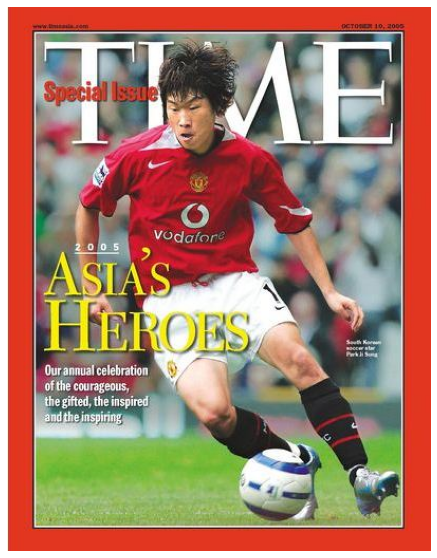

Texts:

"www.asia.com
Special Issue
Vodafore
2005
ASIA'S
HEROES
Our annual celebration
of the courageous,
the gifted, the inspired
and the inspiring
OCTOBER 10, 2000
South Kor
soccer
Park S"

"www.asia.com"

"Special"

"Issue"

"Vodafore"

"2005"

"ASIA'S"

"HEROES"

"Our"

"annual"

"celebration"

"of"

"the"

"courageous"

","

"the"

"gifted"

","

"the"

"inspired"

"and"

"the"

"inspiring"

"OCTOBER"

"10"

","

"2000"

"South"

"Kor"

"soccer"

"Park"

"S"
bounds: (337,327),(340,327),(340,330),(337,330)

[/content/drive/MyDrive/ocr_python/time/hwang.jpg]


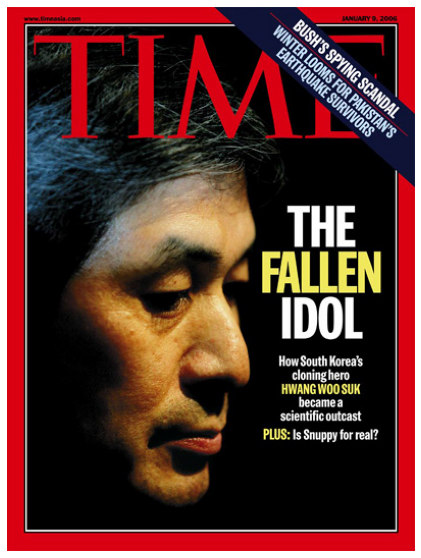

Texts:

"www.timeasia.com
BUSH'S
SPYING SCANDAL
WINTER LUKE SURVIVORN'S
EARTHQUAKE S
JANUARY 9, 2006
THE
FALLEN
IDOL
How South Korea's
cloning hero
HWANG WOO SUK
became a
scientific outcast
PLUS: Is Snuppy for real?"

"www.timeasia.com"

"BUSH'S"

"SPYING"

"SCANDAL"

"WINTER"

"LUKE"

"SURVIVORN'S"

"EARTHQUAKE"

"S"

"JANUARY"

"9"

","

"2006"

"THE"

"FALLEN"

"IDOL"

"How"

"South"

"Korea's"

"cloning"

"hero"

"HWANG"

"WOO"

"SUK"

"became"

"a"

"scientific"

"outcast"

"PLUS"

":"

"Is"

"Snuppy"

"for"

"real"

"?"
bounds: (358,414),(365,414),(365,426),(358,426)



In [7]:
for idx, im in enumerate(time):
    if idx < 2:
        print(f'[{im}]')
        plt.figure(figsize=(10,10))
        plt.imshow(img.imread(im))
        plt.axis('off')
        plt.show()
        detect_text(im)
        print()

## **2.2 keras-OCR**

In [8]:
images = [keras_ocr.tools.read(times) for times in time]
prediction_groups = [pipeline.recognize([times]) for times in time]

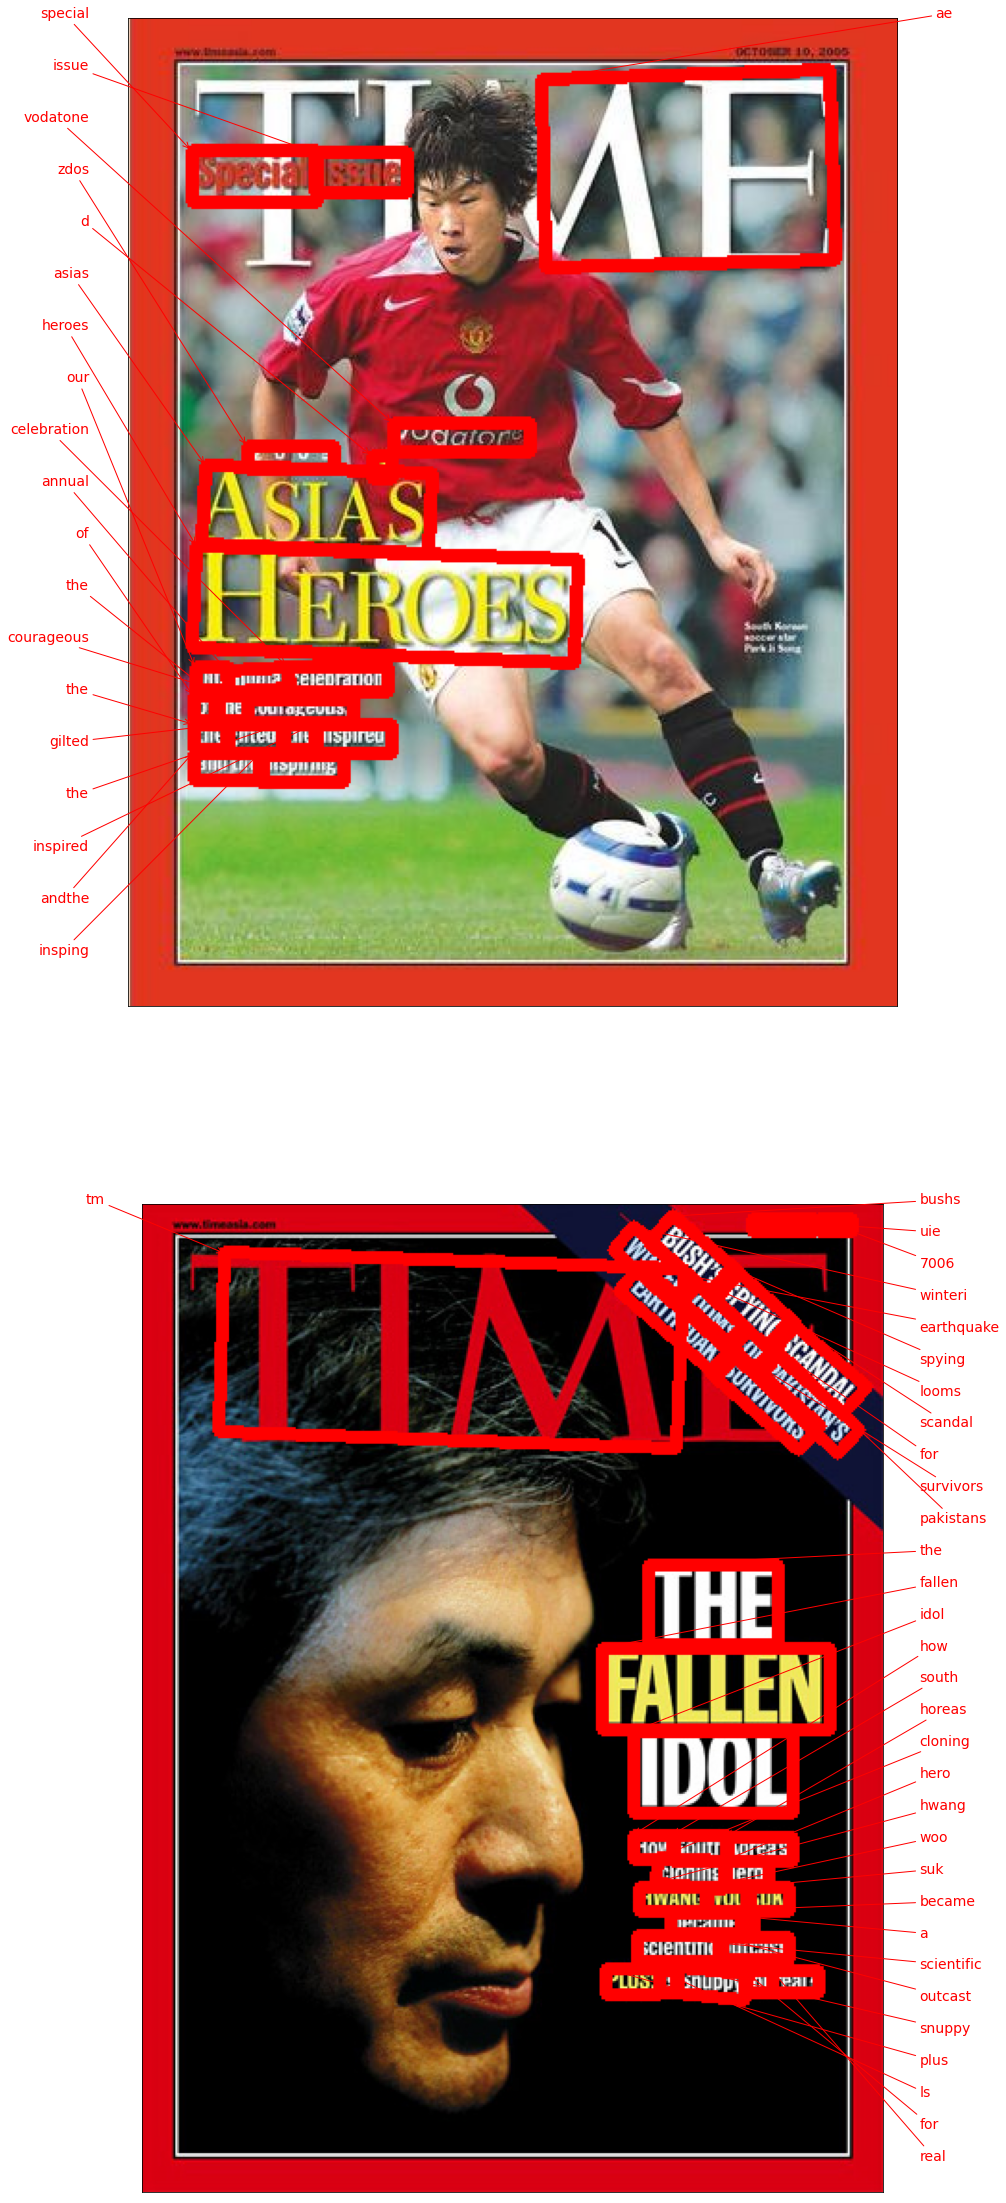

In [9]:
fig, axs = plt.subplots(nrows=2, figsize=(40, 40))
for idx, ax in enumerate(axs):
    if idx <2:
        keras_ocr.tools.drawAnnotations(image=images[idx], 
                                        predictions=prediction_groups[idx][0], ax=ax)

## **2.3 Tesseract**


In [10]:
def recognize_images(image_path='./images/sample.png', output_path='./sample'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 5'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('================================================\n')

[/content/drive/MyDrive/ocr_python/time/ji.jpg]


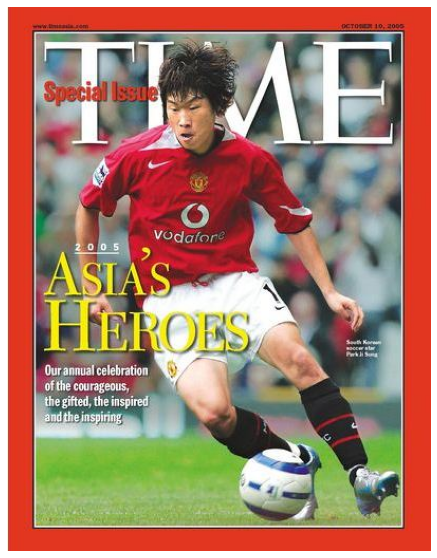


! : yi? i oat e
ee a)
> <= A
a . oO: * ee - 4
: = : 3 ) Saal F
= » = | AD
a * ie) cman et :
| WS Se Wy :


[/content/drive/MyDrive/ocr_python/time/hwang.jpg]


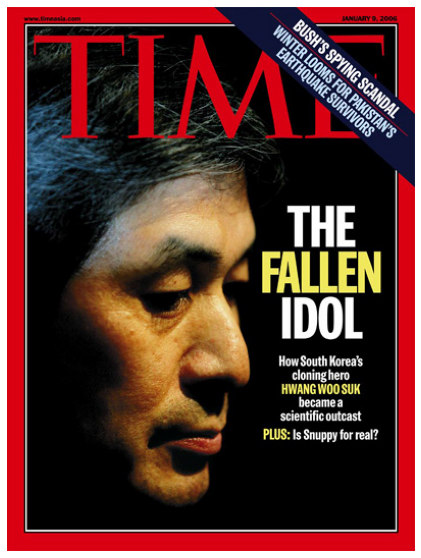


ae 4
©

Vee en ee EEE ee ene eee eee eee

rr





In [11]:
save_dir = '/content/drive/MyDrive/ocr_python/time/'

for idx, times in enumerate(time):
    if idx <2:
        print(f'[{times}]')
        plt.figure(figsize=(10,10))
        plt.imshow(img.imread(times))
        plt.axis('off')
        plt.show()
        try:
            recognize_images(times, save_dir)
        except:
            print(f'Cannot recognize characters from {times}')

## **3. 비교**

In [12]:
def compare_ocr(times):
    print('[keras-ocr]')
    idx = time.index(times)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('================================================\n')
    print('[Tesseract]')
    try:
        recognize_images(os.path.join(img_dir, times), save_dir)
    except:
        print(f'Cannot recognize characters from {times}')


    print('================================================\n')
    print('[Google]')
    detect_text(os.path.join(img_dir, times))
    print('================================================\n')

[keras-ocr]


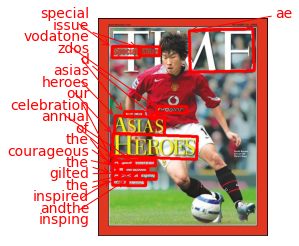


[Tesseract]

! : yi? i oat e
ee a)
> <= A
a . oO: * ee - 4
: = : 3 ) Saal F
= » = | AD
a * ie) cman et :
| WS Se Wy :



[Google]
Texts:

"www.asia.com
Special Issue
Vodafore
2005
ASIA'S
HEROES
Our annual celebration
of the courageous,
the gifted, the inspired
and the inspiring
OCTOBER 10, 2000
South Kor
soccer
Park S"

"www.asia.com"

"Special"

"Issue"

"Vodafore"

"2005"

"ASIA'S"

"HEROES"

"Our"

"annual"

"celebration"

"of"

"the"

"courageous"

","

"the"

"gifted"

","

"the"

"inspired"

"and"

"the"

"inspiring"

"OCTOBER"

"10"

","

"2000"

"South"

"Kor"

"soccer"

"Park"

"S"
bounds: (337,327),(340,327),(340,330),(337,330)

[keras-ocr]


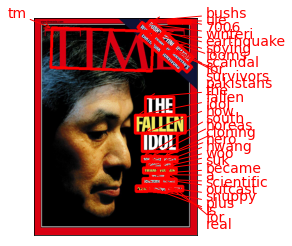


[Tesseract]

ae 4
©

Vee en ee EEE ee ene eee eee eee

rr




[Google]
Texts:

"www.timeasia.com
BUSH'S
SPYING SCANDAL
WINTER LUKE SURVIVORN'S
EARTHQUAKE S
JANUARY 9, 2006
THE
FALLEN
IDOL
How South Korea's
cloning hero
HWANG WOO SUK
became a
scientific outcast
PLUS: Is Snuppy for real?"

"www.timeasia.com"

"BUSH'S"

"SPYING"

"SCANDAL"

"WINTER"

"LUKE"

"SURVIVORN'S"

"EARTHQUAKE"

"S"

"JANUARY"

"9"

","

"2006"

"THE"

"FALLEN"

"IDOL"

"How"

"South"

"Korea's"

"cloning"

"hero"

"HWANG"

"WOO"

"SUK"

"became"

"a"

"scientific"

"outcast"

"PLUS"

":"

"Is"

"Snuppy"

"for"

"real"

"?"
bounds: (358,414),(365,414),(365,426),(358,426)

[keras-ocr]


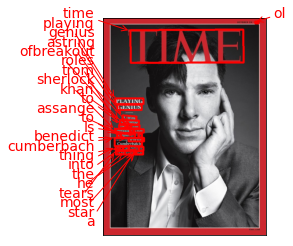


[Tesseract]

Be BE et J errrrs SSS NSS i ..$jESSS=S=sss ss Se } } } }  »°— TEES 09 SSS Oe

-
ra
s
es
-
rw

<L,
=
=
2
=
c

bre
bre

=
3)
5
5
i

E
F
:

5

ce
E

E
E
i

.
E
¥
e

=


:
i
:
:
:

E
:
5

ce
fs
F
:;
2
E
E
ke



“7

Fy
Ee

p
Ee
EE:
EE


FV es
- ba "
9.

Nn eee ee ———EEEOEOoEEEEEEeeEEeEEEEEeEeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEOEOEOEeeeeeEeEeEeEeeEeEeEeEeEeEeEeEeEeEeEOEOEOEOEeeeeeeeeeeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEOOeeeeeeeeeeeoe en eee ee ee ee ee



[Google]
Texts:

"OCTOBER 28, 2013
TIME
PLAYING
GENIUS
A string
of breakout
roles-from
Sherlock to Khan
to Assange is
turning Benedict
Cumberbatch
into the thing he
most fears: a star
time.com"

"OCTOBER"

"28"

","

"2013"

"TIME"

"PLAYING"

"GENIUS"

"A"

"string"

"of"

"breakout"

"roles"

"-"

"from"

"Sherlock"

"to"

"Khan"

"to"

"Assange"

"is"

"turning"

"Benedict"

"Cumberbatch"

"into"

"the"

"thing"

"he"

"most"

"fears"

":"

"a"

"star"

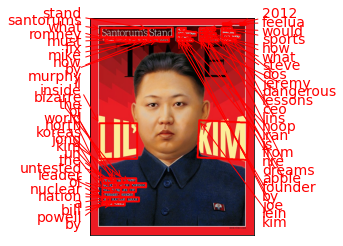


[Tesseract]
™.


2
=
E
:
5
=

wv
iE
e
z
igo
Cf)

:
=

Fy
a
BE
<a

5,
u

Pe
Be
x

$
B
2



S

a
3
3
3
3
S

=

E
E
=
B
:
=

:
:
:
:
:
:
i

ret

5
=

i
S

e
s

=
=]

S
S
8
8
3
2
g
=
i=

ay
Ss

i
is
S
is
£
=
fs
S
is
iS
=
=

FS
i
E
:
a
>

"

5 i
HE =
EEL)
ay 7 Cy
PErtie
Be —~
pir , 4
g "
Ho MG
ray \
o = Lf :
ons = i a 2
i E : 14
eae re ia
Ree} a .
H
ig
Ee <4 aoe
i q oer
6: ’ eer]
4q coat ao
oe ‘ Sacires
SS es é
er: Se
Sale
oe 5 ee eS



[Google]
Texts:

"FEBRUARY 27, 2012
SPORTS
Santorum's Stand |
How
dangerous
is Iran?
BY JOE KLEIN
WHAT WOULD
STEVE DO?
CEO LESSONS
FROM THE
Jeremy
Lin's hoop
dreams
+ What Romney must fix now by Mike Murphy
APPLE FOUNDER
TE
LIL KIM
Inside the bizarre
world of North Korea's
Kim Jong Un, the
untested leader
of a nuclear nation
BY BILL POWELL
www.time.com"

"FEBRUARY"

"27"

","

"2012"

"SPORTS"

"Santorum's"

"Stand"

"|"

"How"

"dangerous"

"is"

"Iran"

"?"

"BY"

"JOE"

"KLEIN"

"WHAT"

"WOULD"

"STEVE"

"DO"

"?"

"CEO"

"LESSO

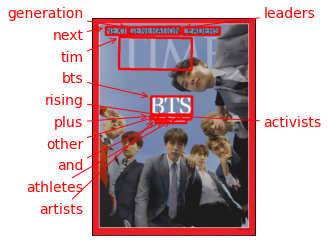


[Tesseract]
Cannot recognize characters from /content/drive/MyDrive/ocr_python/time/bts.jpg

[Google]
Texts:

"NEXT GENERATION LEADERS
TIME
BTS
Plus other rising activists,
artists and athletes
OCTOBER 22, 2018"

"NEXT"

"GENERATION"

"LEADERS"

"TIME"

"BTS"

"Plus"

"other"

"rising"

"activists"

","

"artists"

"and"

"athletes"

"OCTOBER"

"22"

","

"2018"
bounds: (459,12),(476,12),(476,17),(459,17)

[keras-ocr]


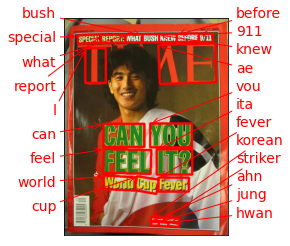


[Tesseract]
|) Re

JF yr, |

4 LD fa a
=) Gaus

= a a

B rs wll

SS



[Google]
Texts:

"MAY 27, 2002
www.lineasia.com
SPECIAL REPORT: WHAT BUSH KNEW BEFORE 9/11
TME
CAN YOU
FEEL IT?
World Cup Fever
Korean Striker
Ahn Jung Hwan"

"MAY"

"27"

","

"2002"

"www.lineasia.com"

"SPECIAL"

"REPORT"

":"

"WHAT"

"BUSH"

"KNEW"

"BEFORE"

"9/11"

"TME"

"CAN"

"YOU"

"FEEL"

"IT"

"?"

"World"

"Cup"

"Fever"

"Korean"

"Striker"

"Ahn"

"Jung"

"Hwan"
bounds: (308,604),(335,605),(335,614),(308,613)

[keras-ocr]


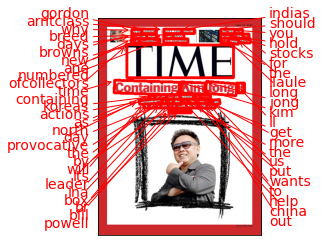


[Tesseract]
5/4

=
S

:
5

gE :
Ee i
Bees E
Bee F
e2
B2u a Ta
zl l | apenas =f
: a
ty dae
2 a5 oo wee
258 Bes <(,
oe eee
5bS a
eek Zou j
Ses 2” ~Bppaseepcetaraperecliiaiennith
22e j\— Se saree tar
$28 :
“y
7)

4
:
d
t

-
2

=
:
z

E

z
2

gE :
Ee i
Bees E
Bee F
e2
B2u a Ta
zl l | apenas =f
: a
ty dae
2 a5 oo wee
258 Bes <(,
oe eee
5bS a
eek Zou j
Ses 2” ~Bppaseepcetaraperecliiaiennith
22e j\— Se saree tar
$28 :
“y
7)

%

Z
Z

E
S

-
g
g

s

e
z
Z
#

gE :
Ee i
Bees E
Bee F
e2
B2u a Ta
zl l | apenas =f
: a
ty dae
2 a5 oo wee
258 Bes <(,
oe eee
5bS a
eek Zou j
Ses 2” ~Bppaseepcetaraperecliiaiennith
22e j\— Se saree tar
$28 :
“y
7)

=
=
=

g
:
3

=
=

om

a=

S55
235
223
see
Be
2g
z 58
zee
ens
——
fee
PEE
<4

a

=
E
S

5
S

yy


:

al

£
s

5

s
s

4.
4.

E

—

By
Be

a

3
z


s

=
S

E
z

oc
eo

=

B
Ee

=
E

Sa
i / ae
¥
mm
ME aed
0D peocap enema sam



[Google]
Texts:

"Why Gordon
Brown's Days
Are Numbered
Art Class: India's
New Breed
Of Co

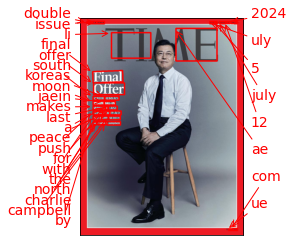


[Tesseract]
Lia} ——/
.
—— j
__<S SH R SS Sea
ac
i 3
\— SD genset
{252 r
,



[Google]
Texts:

"DOUBLE ISSUE
JULY 5/ JULY 12, 2021
TIME
Final
Offer
SOUTH KOREA'S
MOON JAE-IN
MAKES A LAST
PUSH FOR PEACE
WITH THE NORTH
by Charlie Campbell
time.com"

"DOUBLE"

"ISSUE"

"JULY"

"5"

"/"

"JULY"

"12"

","

"2021"

"TIME"

"Final"

"Offer"

"SOUTH"

"KOREA'S"

"MOON"

"JAE"

"-"

"IN"

"MAKES"

"A"

"LAST"

"PUSH"

"FOR"

"PEACE"

"WITH"

"THE"

"NORTH"

"by"

"Charlie"

"Campbell"

"time.com"
bounds: (685,991),(735,992),(735,1001),(685,1000)

[keras-ocr]


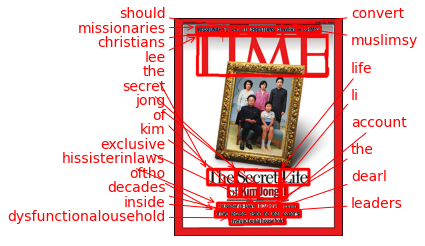


[Tesseract]


=§
s

a
:

a4
ase
eae
at
:

5 gz
4S
zg


=

5
3
oO

=

=

5

=


=.
=
5
3.
3
2
2

&
=
z
2




Ss
|
3
5
3
z

a  EE_____________—————————————————————————————————————————————————————————————————————————————————————————————————————————————— TT



[Google]
Texts:

"www.fisi.comm
JUNE 30, 2003
MISSIONARIES: SHOULD CHRISTIANS CONVERT MUSLIMS?
IM
The Secret Life
of Kim Jong Il
His sister-in-law's EXCLUSIVE account
of two decades inside the Dear Leader's
dysfunctional household
STRAT"

"www.fisi.comm"

"JUNE"

"30"

","

"2003"

"MISSIONARIES"

":"

"SHOULD"

"CHRISTIANS"

"CONVERT"

"MUSLIMS"

"?"

"IM"

"The"

"Secret"

"Life"

"of"

"Kim"

"Jong"

"Il"

"His"

"sister"

"-"

"in"

"-"

"law's"

"EXCLUSIVE"

"account"

"of"

"two"

"decades"

"inside"

"the"

"Dear"

"Leader's"

"dysfunctional"

"household"

"STRAT"
bounds: (265,334),(278,236),(288,237),(275,335)

[keras-ocr]


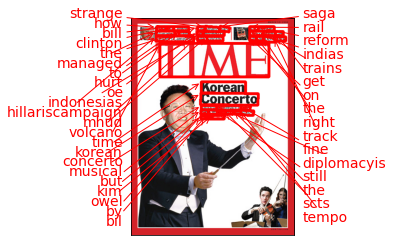


[Tesseract]
”
%

Z
s

:
=

E

¥
¥

e

a

=
5
be

F:
£

5

:
:
c
i
=

4 — :
BE ~ L, i

Soe

ae £2. ®) \
is | st ve

ao.

P. O22:

Cae Lee

ees 002 Yy

ase ay |

a2 MO2: j

eb eT -

abe

ee

hae

Ba

i



¥,
y
a

E
:
F

4 — :
BE ~ L, i

Soe

ae £2. ®) \
is | st ve

ao.

P. O22:

Cae Lee

ees 002 Yy

ase ay |

a2 MO2: j

eb eT -

abe

ee

hae

Ba

i

7

:
E

e
Z
=

2
E
&

4 — :
BE ~ L, i

Soe

ae £2. ®) \
is | st ve

ao.

P. O22:

Cae Lee

ees 002 Yy

ase ay |

a2 MO2: j

eb eT -

abe

ee

hae

Ba

i

e
s

:
Z

hs
7}
£5

eg


=
=
3
E
°
¢)

Z

¢
‘
2
e

2
:
3

2
3
4
4
=f

C





[Google]
Texts:

"MARCH 14, 19
Rail Reform:
India's Trains Get
On the Right Track
How Bill Clinton
Managed to Hurt
Hillary's Campaign Mud Volcano
The Strange Saga
Of Indonesia's
TIME
Korean
Concerto
Musical diplomacy is fine,
but Kim still sets the tempo
BY BILL POWELL"

"MARCH"

"14"

","

"19"

"Rail"

"Reform"

":"

"India's"

"Trains"

"Get"

"On"

"the"

"Right"

"Track"

"Ho

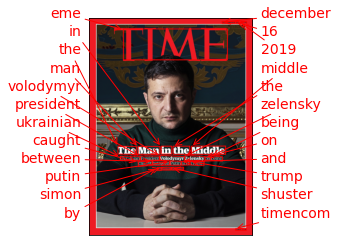


[Tesseract]

é

i

s


=
a
fs
=
S
SH
M
)

is
is
O
i?
ie
ae

S
5
3
d
=

>
]
77)
f=]
)
—
v
el

=
@

sore
re
id)
lo}

ot
I
aS

=
io}
a
=
£
feb
oO

=
a
im
QO

[e
S
fan’

2
=
=
=

IE i
“ok : > g
AA iy :
ns . ‘=|
re | E
Ray Ss
z : a5
tL
eae r BE x
¢ f= >) a g f-
a j | e | eS E : \
. std yi & ry s oye , ‘
a (6 e ata \ 4
a ae gis :
a - a FF * oe
y b | @ 00
ti = ara
& a o
. FE
} : e
+ | £
Be | a 5 <«
i "
3 : x oe
E ll S we



[Google]
Texts:

"DECEMBER 16, 2019
I TIME
酒
***
The Man in the Middle
Ukrainian President Volodymyr Zelensky on being
caught between Putin and Trump
By Simon Shuster
time.com"

"DECEMBER"

"16"

","

"2019"

"I"

"TIME"

"酒"

"***"

"The"

"Man"

"in"

"the"

"Middle"

"Ukrainian"

"President"

"Volodymyr"

"Zelensky"

"on"

"being"

"caught"

"between"

"Putin"

"and"

"Trump"

"By"

"Simon"

"Shuster"

"time.com"
bounds: (1143,1656),(1225,1656),(1225,1668),(1143,1668)

[keras-ocr]


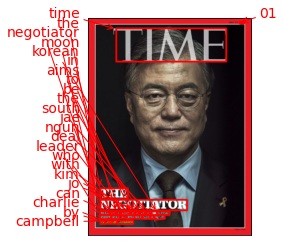


[Tesseract]

mma
<a

=,
=e
=

A
E
Ss
F
g
=

=
:
=

fe
i
£
g

ov

Fe
[>
.
Bi

=

=
$

pe
=
=
E
5
2

mn
f=

S
=

cy
F
a
E
F
:
E
E
5
:
Es

Wi | a Ne 2
pe WI :
ee Billa 3.0 C4 : ei
id AN! aan ) ‘ 58
Ai IRA j Ly) Wise n4
aa! a ee EE
a rE
SS ae re
| if
tt
EEE




[Google]
Texts:

"TIME
THE
NEGOTIATOR
Moon Jae-in aims to be the South Korean
leader who can deal with Kim Jong Un
By Charlie Campbell
MAY 15, 2017
time.com"

"TIME"

"THE"

"NEGOTIATOR"

"Moon"

"Jae"

"-"

"in"

"aims"

"to"

"be"

"the"

"South"

"Korean"

"leader"

"who"

"can"

"deal"

"with"

"Kim"

"Jong"

"Un"

"By"

"Charlie"

"Campbell"

"MAY"

"15"

","

"2017"

"time.com"
bounds: (570,826),(613,826),(613,833),(570,833)

[keras-ocr]


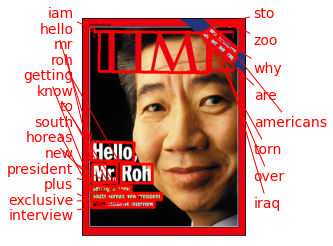


[Tesseract]
s
=
s
:



$3
35
A
H

. 2
rr

Ai
ys
i :

re

iF r <a
oot LSA ri?
hus CS fe iH
—_ eet
$F

————eeooOEOOoEeEEEEEEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeeeeeeeeEeEeEeEeEeEOeeEeEeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEOEeeEeEeEeEeEeEeEeEeEeEeeeeeOEOeEEEeeeeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeeeeEeeeOeEeeeEeEeEeEeEeEeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEEeeeeeeeeeeeeeeEeEeEeEeEOeeeEeEeEeEeEeEeEeEeEeEeaeaeaeEeEeEOEOEOEOEeEeEeEeEeEeEeeeeeeeEeEeeeEEOEOEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeeEeeeOOOEeeeEeEeEeEeEeEeeeeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeEeeOOeeOOOeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee oe ee



[Google]
Texts:

"timeasia.com
TIM
Hello,
Mr. Roh
Getting to know
South Korea's New President
PLUS: Exclusive Interview
MARCH 3, 2003
Why Americans
Are Torn Over Iraq"

"timeasia.com"

"TIM"

"Hello"

","

"Mr."

"Roh"

"Getting"

"to"

"know"

"South"

"Korea's"

"New"

"President"

"PLUS"

":"

"Exclusive"

"Interview"

"MARCH"

"3"

","

"2003"


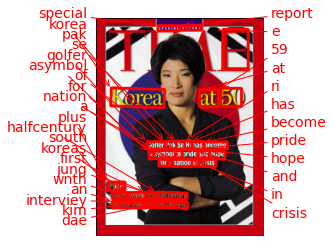


[Tesseract]
«=
E
:
e
=
z
=
=
=
&
5
Cs

=
S

—
=
FE
FE

ES
r

Ee

=

°c
re
nS

=
2
2

a
os
es

=

=
E

=
oI

S
a

Ss

=
=

4

o
‘2
FS
f=
=
=
E
FS
=
S
pe
Ss

b
E
s H
; Pee
aa aH
ca
ae: °
ae
4



[Google]
Texts:

"www.time.com/asia
AUGUST 17, 1998
SPECIAL REPORT
n
LE
Korea
at 50
Golfer Pak Se Ri has become
a symbol of pride and hope
for a nation in crisis
PLUS
South Korea's first half-century
An interview with Kim Dae Jung"

"www.time.com/asia"

"AUGUST"

"17"

","

"1998"

"SPECIAL"

"REPORT"

"n"

"LE"

"Korea"

"at"

"50"

"Golfer"

"Pak"

"Se"

"Ri"

"has"

"become"

"a"

"symbol"

"of"

"pride"

"and"

"hope"

"for"

"a"

"nation"

"in"

"crisis"

"PLUS"

"South"

"Korea's"

"first"

"half"

"-"

"century"

"An"

"interview"

"with"

"Kim"

"Dae"

"Jung"
bounds: (188,438),(216,438),(216,453),(188,453)

[keras-ocr]


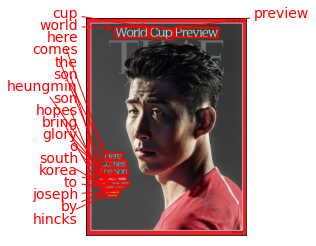


[Tesseract]

=
©
=

5
oS
1@)

fs
—
ey
S
mis

a
ie
44 ll Ree. tes . — j
& -— , “4
M ls
¥ : \ mee
waa. sey
ee
PS x : wees
one ey
Sear
OSs bee



[Google]
Texts:

"World Cup Preview
Here
Comes
The Son
Son Heung-min
hopes to bring glory
to South Korea
By Joseph
Hincks
JUNE 18, 2018"

"World"

"Cup"

"Preview"

"Here"

"Comes"

"The"

"Son"

"Son"

"Heung"

"-"

"min"

"hopes"

"to"

"bring"

"glory"

"to"

"South"

"Korea"

"By"

"Joseph"

"Hincks"

"JUNE"

"18"

","

"2018"
bounds: (566,13),(587,13),(587,19),(566,19)



In [13]:
for times in time:
    compare_ocr(times)

## **회고**

1. 우선 이번 익스 12는 개인적으로 가장 난이도가 어려웠습니다.  
첫번째로 설치해야 툴들이 많다는 문제들부터 시작으로 컨테이너에서 실행을 할 때 커널이 총 9번 죽었습니다.  
그렇게 되면서 쥬피터에서 코랩으로 옴길 때에도 모든 코드들을 수정해야 했습니다.
또한 구글 API를 사용할 때 역시 유료회원으로 회원 가입을 한 상태로 키를 받아야 제대로 작동하였고 이러한 문제를 잡는데 많은 시간이 걸렸습니다.
그렇기 때문에 이번노든 어느정도 잘 마무리가 되었지만 반감을 가지고 있습니다.  
  
    


2. 테서렉트를 설치 할 때에 처음에는 *!sudo apt install tesseract-ocr-kor* 이 코드를 넣지 않고 실행하였습니다.
위의 코드가 없다보니 사진은 계속 나오는데 테서렉트가 설치 안 되어있다는 오류가 있었고 계속해서 해결이 되지 않았습니다.
구글링 검색을 하였을 때 대부분 로컬 환경에서 나오는 가이드들이였기 때문에 이 코드 해결하는 데에 있어서 시간을 꽤나 많이 걸렸고 다른 사람들이 한 것을 참고 해서야 겨우 해결 할 수 있었습니다.  


3. 타임즈 잡지를 선정한 이유는 타임즈는 예전부터 커버스토리가 매우 인상 깊었고 역사가 있는 중요한 기록물이였습니다.
그렇기 때문에 한국과 관련된 타임즈 잡지의 앞 부분을 분석하여 정리 하고 그것을 기반으로 자동적으로 기록을 하는 것들이 있으면 어떨까 하는 생각에 타임즈 잡지를 선정해 보았습니다.  
"타임즈 선정 아이펠 최고 섹시 미남 = 김도현" 이런게 언젠간 생겼으면 좋겠습니다.

4. 개인적으로 가장 효과가 좋은 것은 구글 api라고 생각합니다.
무료로 공개 되어 있는 이 api의 성능은 대단 하다고 생각합니다.  
또한 테서렉트의 정확도는 심각하게 별로 라고 생각합니다.  
제가 잘 다루지 못하는 것일 수도 있지만 가장 성능이 안 좋게 나왔습니다.